In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
list=pd.read_csv("C:\\Users\\Admin\\Downloads\\StudentsPerformance.csv")

In [95]:
list.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df1=list[list['gender']=='female']
df2=list[list['gender']=='male']

In [8]:
g=df1.groupby(["race/ethnicity"]).mean()
g

,math score,reading score,writing score
race/ethnicity,,,
group A,58.527778,69.000000,67.861111
group B,61.403846,71.076923,70.048077
group C,62.033333,71.944444,71.777778
group D,65.248062,74.046512,75.023256
group E,70.811594,75.840580,75.536232


In [9]:
b=df2.groupby(['race/ethnicity']).mean()
b

,math score,reading score,writing score
race/ethnicity,,,
group A,63.735849,61.735849,59.150943
group B,65.930233,62.848837,60.220930
group C,67.611511,65.424460,62.712230
group D,69.413534,66.135338,65.413534
group E,76.746479,70.295775,67.394366


In [54]:
a=len(df2.loc[(df2['parental level of education']=='bachelor\'s degree') & (df2['math score']>80 ) & (df2['reading score']>85)])
b=len(df2.loc[df2['parental level of education']=='bachelor\'s degree'])
print((a/b)*100)

9.090909090909092


In [57]:
c=df2.loc[(df2['race/ethnicity']=='group E')]
c1=c.loc[(c['parental level of education']=='high school')|(c['parental level of education']=='bachelor\'s degree')]
c1.count()[0]

18

In [33]:
l1= list[['race/ethnicity',
      'math score','reading score','writing score']].groupby(['race/ethnicity']).agg('max')
l1

,math score,reading score,writing score
race/ethnicity,,,
group A,100,100,97
group B,97,97,96
group C,98,100,100
group D,100,100,100
group E,100,100,100


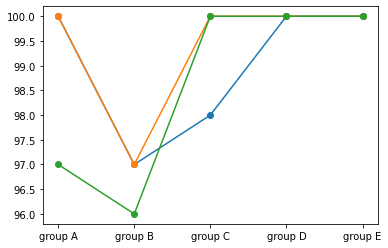

In [35]:
plt.plot(l1, marker = 'o')

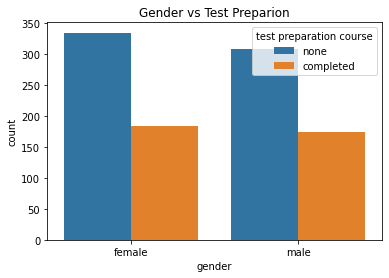

In [42]:
sns.countplot(x = 'gender', data = list,  hue = 'test preparation course')
plt.title('Gender vs Test Preparion')
plt.show()

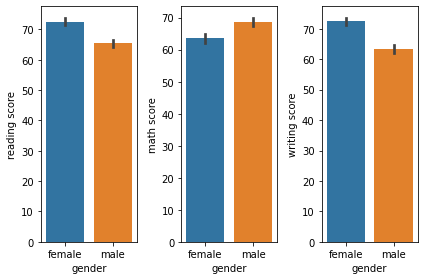

In [47]:
fig,axes=plt.subplots(1,3)
sns.barplot(ax=axes[0],data=list,x='gender',y='reading score')
sns.barplot(ax=axes[1],data=list,x='gender',y='math score')
sns.barplot(ax=axes[2],data=list,x='gender',y='writing score')
plt.tight_layout()

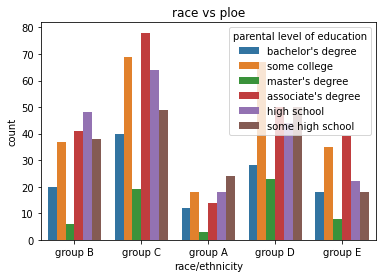

In [48]:
sns.countplot(x='race/ethnicity',data=list,hue='parental level of education')
plt.title('race vs ploe')
plt.show()

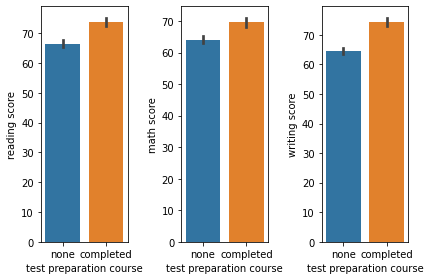

In [49]:
fig,ax=plt.subplots(1,3)
sns.barplot(ax=ax[0],data=list,x='test preparation course',y='reading score')
sns.barplot(ax=ax[1],data=list,x='test preparation course',y='math score')
sns.barplot(ax=ax[2],data=list,x='test preparation course',y='writing score')
plt.tight_layout()

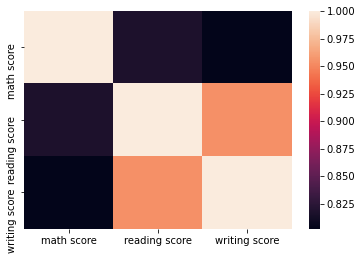

In [62]:
sns.heatmap(list.corr())

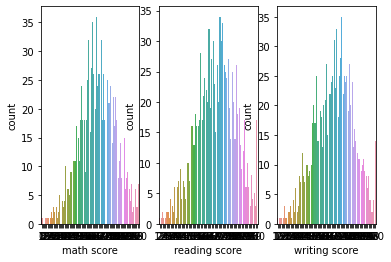

In [68]:
f,axs=plt.subplots(1,3)
sns.countplot(ax=axs[0],data=list, x='math score')
sns.countplot(ax=axs[1], data=list, x='reading score')
sns.countplot(ax=axs[2],data=list, x='writing score')
#left skewed

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [89]:
X = list.iloc[:, :-1].values
for i in range(7):
    X[:,i] = le.fit_transform(X[:,i])